##### This notebook is meant to be primarily used to check if there are satellite images present that are common among both the massachusetts buildings and the roads dataset.
##### This notebook also combines the Massachusetts buildings and roads datasets' images and masks

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [103]:
from fastai.vision import *
import cv2
from tqdm import tqdm_notebook as tqdm
import multiprocessing as mp

In [3]:
B_IMGS = Path('mass_buildings/train/sat')
B_MSKS = Path('mass_buildings/train/map')
R_IMGS = Path('mass_roads/train/sat')
R_MSKS = Path('mass_roads/train/map')

# Comparing datasets images

#### Comparing size of both datasets

In [5]:
len(B_IMGS.ls()), len(R_IMGS.ls())
# The buildings dataset is much smaller than the roads dataset

(137, 1108)

#### Comparing sizes of images in datasets

In [6]:
im_b = open_image(B_IMGS.ls()[0])
im_r = open_image(R_IMGS.ls()[0])

In [7]:
im_b.shape, im_r.shape
# Images are of the same size

(torch.Size([3, 1500, 1500]), torch.Size([3, 1500, 1500]))

#### Checking for common images

In [6]:
# Getting names of all images in the roads (r) and the buildings dataset (b)
r_names = set(sorted([o.name for o in R_IMGS.ls()]))
b_names = set(sorted([o.name for o in B_IMGS.ls()]))

In [10]:
print(len(b_names.intersection(r_names)))
print(len(b_names.difference(r_names)))

143
0


# Combining masks

In [11]:
r_names = set(sorted([o.name for o in R_MSKS.ls()]))
b_names = set(sorted([o.name for o in B_MSKS.ls()]))

In [13]:
len(b_names.intersection(r_names)), len(b_names.difference(r_names))

(151, 0)

The above count tells us that all the images with a buildings mask also have a roads mask

In [16]:
r_names = sorted(list(r_names))
b_names = sorted(list(b_names))

#### Experimentation for combining two masks for the same image (IGNORE)

In [19]:
msk1 = open_mask(B_MSKS/b_names[0])
msk2 = open_mask(R_MSKS/b_names[0])

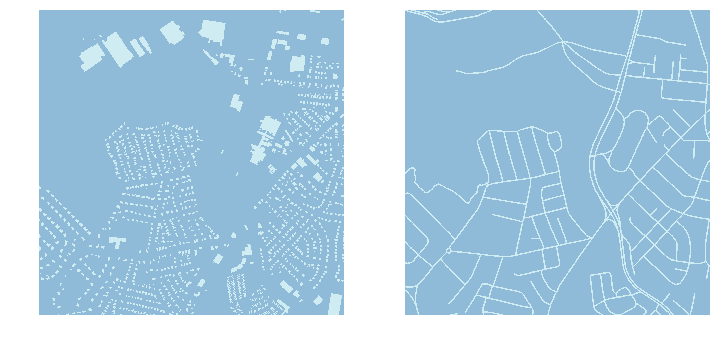

In [20]:
show_all([msk1, msk2])

These masks seem to correspond well

In [64]:
npmsk1 = msk1.data.squeeze().numpy()
npmsk2 = msk2.data.squeeze().numpy()

In [65]:
print(np.unique(npmsk2), np.unique(npmsk1))
print(np.unique(npmsk2.clip(0, 1)), np.unique(npmsk1.clip(0, 1)))

[  0 255] [ 0 76]
[0 1] [0 1]


In [66]:
npmsk1 = npmsk1.clip(0, 1)
npmsk2 = npmsk2.clip(0, 2)
npmsk2 = npmsk2 - npmsk2 * npmsk1

# Roads overlap with houses
# Since this is not possible in any real scenario, we will arbitrarily choose to keep the road pixels
# whenever such an intersection arises

In [68]:
npmsk3 = (npmsk1 + npmsk2)

In [75]:
dest = Path('tmp/sample.png')

In [76]:
cv2.imwrite(str(dest), npmsk3)

True

In [77]:
msk = open_mask(dest)

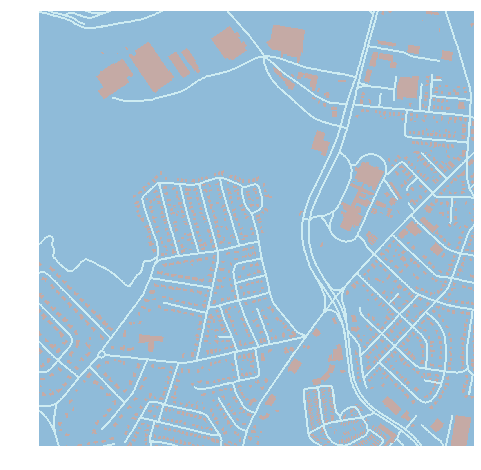

In [80]:
msk.show(figsize=(8,8))

In [84]:
msk = cv2.imread(str(dest), cv2.IMREAD_GRAYSCALE)

### Combining masks now

In [139]:
from helper_functions import *

In [129]:
dest = Path('combined_masks')
def process_mask(f):
    """
    Takes as input the name of a mask
    Gets the Road and Building Mask and saves it accordingly
    """
    road, building = get_masks(f)
    if building == 'False':
        save_mask(road, dest/f)
    else:
        save_mask(combine_masks(road, building), dest/f)

The below code helps parallelize the whole process of combining masks and saving them and hence runs 8X faster

In [130]:
pool = mp.Pool(mp.cpu_count())

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/home/akash/anaconda3/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after 

In [133]:
pool.map(process_mask, r_names)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,